In [1]:
import os
from keras.models import Sequential
from keras import layers, regularizers, optimizers
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import requests
import json
import numpy as np
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.
C:\Users\a.lunev\Anaconda3\envs\ML_GPU\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#### Read from CSV
my_data = np.genfromtxt('e:\EURUSD-2000-2019.csv', delimiter=',', skip_header=1)
#my_data = np.concatenate((bin_days, my_data), axis=1)
my_data = np.delete(my_data, 1, 1)
#for i, data in enumerate(my_data):
#    my_data[i][0] = (datetime.strptime(str(data[0]), "%Y%m%d.0")).isoweekday()
#my_data = my_data[np.logical_not(my_data[:,0] == 7)]
#bin_days = to_categorical(my_data[:,0])
my_data = np.delete(my_data, 0, 1)

In [3]:
my_data[:,0] = my_data[:,1] - my_data[:,2]

In [4]:
my_data = np.delete(my_data, 1, 1)
my_data = np.delete(my_data, 1, 1)
my_data = np.delete(my_data, 2, 1)

In [5]:
my_data = np.delete(my_data, 0, 1)
my_data[0]

array([1.12292])

In [4]:
#### Read from DB
# auth_url = 'http://185.49.144.175/api/token/'
# bar_url = 'http://185.49.144.175/api/bars/?timeframe=1'
# headers = {'Content-type': 'application/json', 'Content-Encoding': 'utf-8'}
# data = {"username": "lim","password": "Serialnomberr3"}
# answer = requests.post(auth_url, data=json.dumps(data), headers=headers)
# response = answer.json()
# token = response['access']
# headers = {'Authorization': 'Bearer ' + token}
# answer = requests.get(bar_url, headers=headers)
# response = answer.json()
# f_data = np.zeros((len(response), 6))
# for i, bar in enumerate(response):
#     date = datetime.strptime( bar['time'], "%Y-%m-%dT%H:%M:%SZ" )
#     values = [date.isoweekday(), float(bar['open']), float(bar['close']), float(bar['high']), float(bar['low']), float(bar['tick_volume'])]
#     f_data[i, :] = values
# f_data = np.flip(f_data,0)
# bin_days = to_categorical(f_data[:,0])
# f_data = np.delete(f_data, 0, 1)
# f_data = np.concatenate((bin_days, f_data), axis=1)

In [17]:
# Normalize tick_volume
#f_data = np.delete(my_data, 4, 1)
# f_data = np.delete(f_data, 0, 1)
# f_data = np.delete(f_data, 0, 1)
# f_data = np.delete(f_data, 0, 1)
f_data = my_data
# for col in range(0,f_data.shape[-1]):
#     min = f_data[:1500000, col].min(axis=0)
#     max = f_data[:1500000, col].max(axis=0)
#     f_data[:, col] = (f_data[:, col] - min) / (max - min)

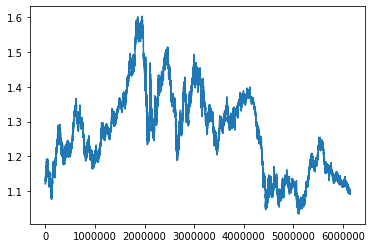

In [8]:
#Нормализация цены закрытия
minx = min(my_data)
maxx = max(my_data)
print(minx, maxx)
f_data = my_data
f_data = (f_data - minx) / (maxx - minx)

[1.03435] [1.60305]


In [11]:
my_data[0]

array([1.12292])

In [9]:
# Делаем массивы нужных размеров lookback должен быть >= delay
#lookback=50
#delay=10
#re_data = f_data[:f_data.shape[0]//lookback*lookback,].reshape(-1, lookback)[:-1,]

In [162]:
# =  = my_pe[0]//lookback*lookback].reshape(-1,lookback)[1:,]
#data_bool_y = (data_float_y[:,0] - data_float_y[:,delay-1])

In [13]:
#data_float_y.shape

In [14]:
# dx_0 = 0.0001
# dx_1 = 0.001
# dx_2 = 0.004
# print(max(abs(data_bool_y)), dx_0, dx_1, dx_2)
# data_bool_y_1 = (abs(data_bool_y) <= dx_0).astype('int').reshape(-1,1)
# data_bool_y_2 = ((abs(data_bool_y) > dx_0) * (abs(data_bool_y) <= dx_1) * (data_bool_y > 0)).astype('int').reshape(-1,1)
# data_bool_y_3 = ((abs(data_bool_y) > dx_1) * (abs(data_bool_y) <= dx_2) * (data_bool_y > 0)).astype('int').reshape(-1,1)
# data_bool_y_4 = ((abs(data_bool_y) > dx_2) * (data_bool_y > 0)).astype('int').reshape(-1,1)
# data_bool_y_2_neg = ((abs(data_bool_y) > dx_0) * (abs(data_bool_y) <= dx_1) * (data_bool_y < 0)).astype('int').reshape(-1,1)
# data_bool_y_3_neg = ((abs(data_bool_y) > dx_1) * (abs(data_bool_y) <= dx_2) * (data_bool_y < 0)).astype('int').reshape(-1,1)
# data_bool_y_4_neg = ((abs(data_bool_y) > dx_2) * (data_bool_y < 0)).astype('int').reshape(-1,1)
# data_cat_y = np.concatenate((data_bool_y_1, data_bool_y_2, data_bool_y_3, data_bool_y_4, data_bool_y_2_neg, data_bool_y_3_neg, data_bool_y_4_neg), axis=1)

In [165]:
f_data_train = re_data[:60000,]
f_data_val = re_data[2000000:2100000,]
f_data_test = re_data[60001:,]
f_data_train_y = data_cat_y[:60000,]
f_data_val_y = data_cat_y[2000000:2100000,]
f_data_test_y = data_cat_y[60001:,]

In [166]:
print(np.sum(data_cat_y), np.sum(data_cat_y, axis=0))

122798 [30815 40825  4940    73 41286  4773    86]


In [129]:
print(f_data_train[9], f_data_train_y[9])

[0.1536135  0.15357834 0.15366626 0.15401794 0.15385968 0.15398277
 0.15410586 0.15408827 0.15380693 0.15375418 0.15356075 0.15336733
 0.15241779 0.15387726 0.15403552 0.15387726 0.15378934 0.15366626
 0.15359592 0.15349042 0.15320907 0.15333216 0.15385968 0.1536135
 0.15370142 0.15349042 0.15329699 0.15366626 0.15373659 0.1530684 ] [0 0 0 0 1 0 0]


In [ ]:
lookback = 50
step = 1
delay = 10
batch_size = 20
f_data_train = f_data[:5000000-(delay-1),]
f_data_train_y = my_data[(delay-1):5000000,:]
f_data_val = f_data[5000001:6000000-(delay-1),]
f_data_val_y = my_data[5000001+(delay-1):6000000,:]
f_data_test = f_data[-100:-(delay-1),]
f_data_test_y = my_data[-100+(delay-1):,:]
print(f_data_train.shape)
print(f_data_val.shape)
print(f_data_test.shape)
train_gen = TimeseriesGenerator(f_data_train, f_data_train_y, length=lookback, sampling_rate=step, batch_size=batch_size)
val_gen = TimeseriesGenerator(f_data_val, f_data_val_y, length=lookback, sampling_rate=step, batch_size=1)
test_gen = TimeseriesGenerator(f_data_test, f_data_test_y, length=lookback, sampling_rate=step, batch_size=1)
train_steps = len(train_gen)
val_steps = len(val_gen)
test_steps = len(test_gen)

In [50]:
# train_x=[]
# train_y=[]
# for ts in train_gen:
#     ts_r = ts[0].reshape(batch_size,-1)
#     train_x.append(ts_r[0])
#     train_y = ts[1]
# val_x=[]
# val_y=[]
# for ts in val_gen:
#     ts_r = ts[0].reshape(batch_size,-1)
#     val_x.append(ts_r[0])
#     val_y = ts[1]
test_x=[]
test_y=[]
for ts in test_gen:
    #ts_r = ts[0].reshape(batch_size,-1)
    #val_x.append(ts_r[0])
    test_y.append(ts[1][0][0])

In [55]:
checkpoint = ModelCheckpoint(filepath='best-weights.hdf5', monitor='val_loss', verbose=1, save_best_only=True)
model = Sequential()
model.add(layers.CuDNNGRU(
    units=250, 
    input_shape=(None, f_data_train.shape[-1]),
    return_sequences=False,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None))
model.add(layers.Activation('tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))
#sgd = optimizers.Adam(lr=0.0000001)
sgd = optimizers.RMSprop(lr=0.0000001, rho=0.9)
model.compile(loss='mse', optimizer=sgd)
history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=10, validation_data=val_gen, validation_steps=val_steps, callbacks=[checkpoint])

#history = model.fit(f_data_train, f_data_train_y, epochs=210, validation_split=0.3, callbacks=[checkpoint], verbose=1, batch_size=20)

Epoch 1/10
249998/249998 [==============================] - 9209s 37ms/step - loss: 0.1115 - val_loss: 2.4798e-04

Epoch 00001: val_loss improved from inf to 0.00025, saving model to best-weights.hdf5
Epoch 2/10
249998/249998 [==============================] - 9063s 36ms/step - loss: 0.0032 - val_loss: 1.0460e-04

Epoch 00002: val_loss improved from 0.00025 to 0.00010, saving model to best-weights.hdf5
Epoch 3/10
249998/249998 [==============================] - 8875s 36ms/step - loss: 0.0025 - val_loss: 2.3442e-05

Epoch 00003: val_loss improved from 0.00010 to 0.00002, saving model to best-weights.hdf5
Epoch 4/10
249998/249998 [==============================] - 8902s 36ms/step - loss: 0.0023 - val_loss: 6.2675e-06

Epoch 00004: val_loss improved from 0.00002 to 0.00001, saving model to best-weights.hdf5
Epoch 5/10
249998/249998 [==============================] - 10091s 40ms/step - loss: 0.0021 - val_loss: 9.6005e-07

Epoch 00005: val_loss improved from 0.00001 to 0.00000, saving model

In [44]:
model.save_weights('weights.last.hdf5')
model.load_weights('best-weights.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnngru_6 (CuDNNGRU)       (None, 250)               189750    
_________________________________________________________________
activation_6 (Activation)    (None, 250)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 190,001
Trainable params: 190,001
Non-trainable params: 0
_________________________________________________________________


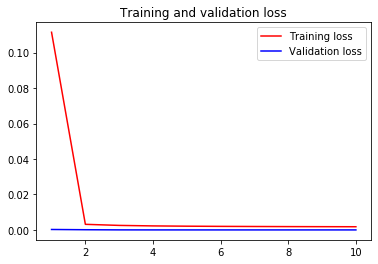

In [56]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
scores = model.predict_generator(test_gen, steps=test_steps)

In [201]:
dx = scores[0] - test_y[0]
scores_dx = scores - dx
dx

array([0.00191043])

In [62]:
print(scores[10][0])
print(test_y[10])

1.093334
1.0926


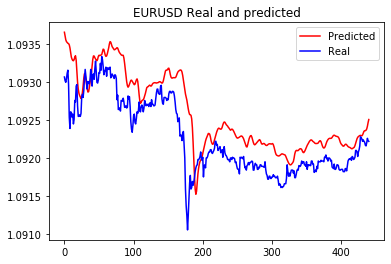

In [59]:
#### from matplotlib import pyplot as plt
plt.plot(range(len(scores)), scores, 'r', label='Predicted')
plt.plot(range(test_steps), test_y, 'b', label='Real')
plt.legend(['Predicted', 'Real'])
plt.title('EURUSD Real and predicted')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(scores)), scores, 'r', label='Predicted')
#plt.legend(['Predicted', 'Real'])
plt.title('EURUSD Predicted')
plt.show()

In [59]:
model.save_weights('weights.last.hdf5')